In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
day = pd.read_csv("day.csv")
hour = pd.read_csv("hour.csv")


In [22]:
day.info()
day.describe(include='all')
day.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
# remove unwanted column
day = day.drop(columns=['instant'])

# remove duplicates
day = day.drop_duplicates()

# fix date column
day['dteday'] = pd.to_datetime(day['dteday'])

# missing values
day = day.fillna(day.mean())
day = day.fillna(day.mode().iloc[0])

# outlier clipping
for col in ['temp','atemp','hum','windspeed','casual','registered','cnt']:
    day[col] = day[col].clip(day[col].quantile(0.05), day[col].quantile(0.95))


day.to_csv("day_cleaned.csv", index=False)


In [25]:
hour.info()
hour.describe(include='all')
hour.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [27]:
# remove unwanted column
hour = hour.drop(columns=['instant'])

# remove duplicates
hour = hour.drop_duplicates()

# fix date column
hour['dteday'] = pd.to_datetime(hour['dteday'])

# missing values
hour = hour.fillna(hour.mean())
hour = hour.fillna(hour.mode().iloc[0])

# outlier clipping
for col in ['temp','atemp','hum','windspeed','casual','registered','cnt']:
    hour[col] = hour[col].clip(hour[col].quantile(0.05), hour[col].quantile(0.95))

# save
hour.to_csv("hour_cleaned.csv", index=False)


<Figure size 1200x600 with 0 Axes>

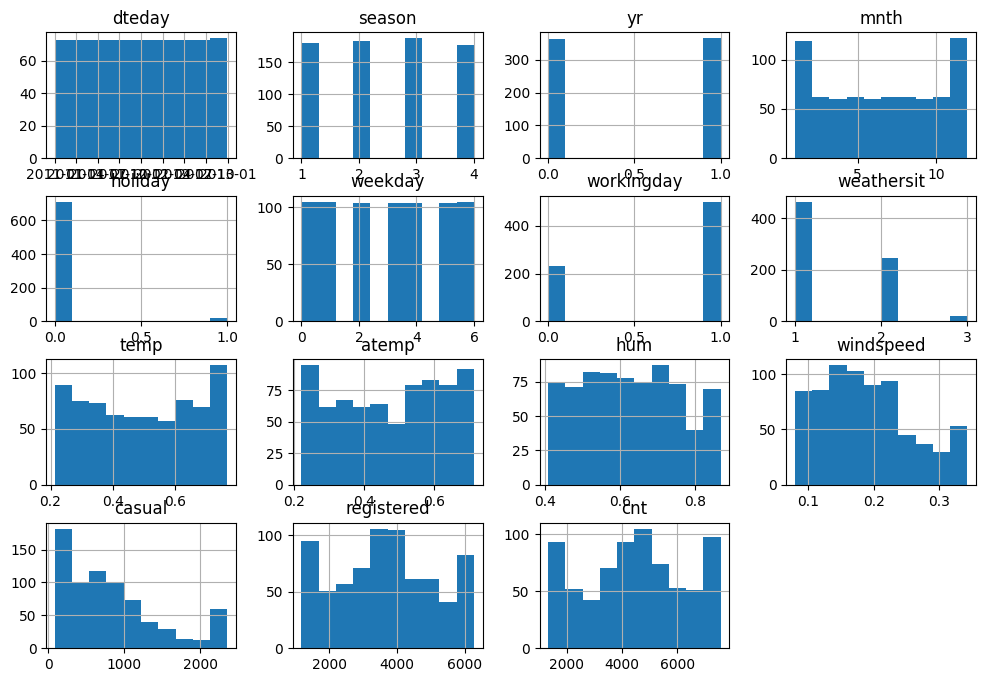

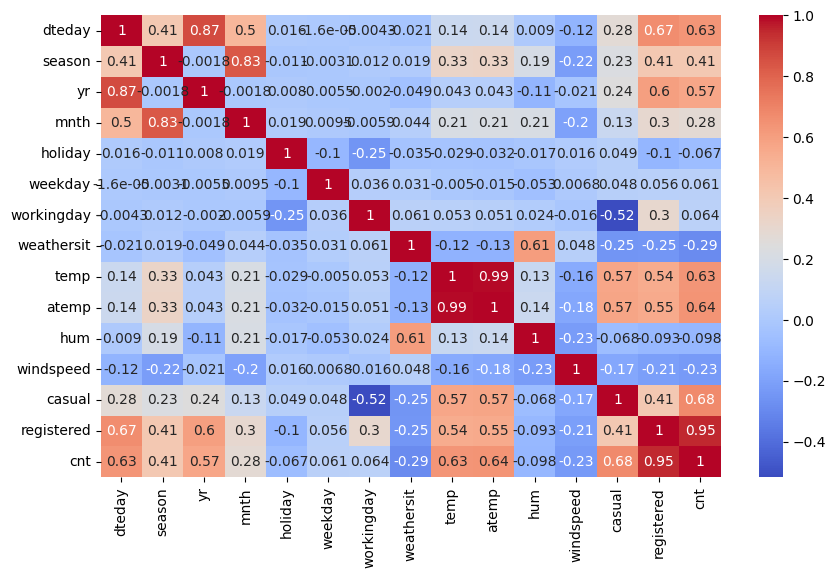

In [28]:
plt.figure(figsize=(12,6))
day.hist(figsize=(12,8))
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(day.corr(), annot=True, cmap="coolwarm")
plt.show()


<Figure size 1200x600 with 0 Axes>

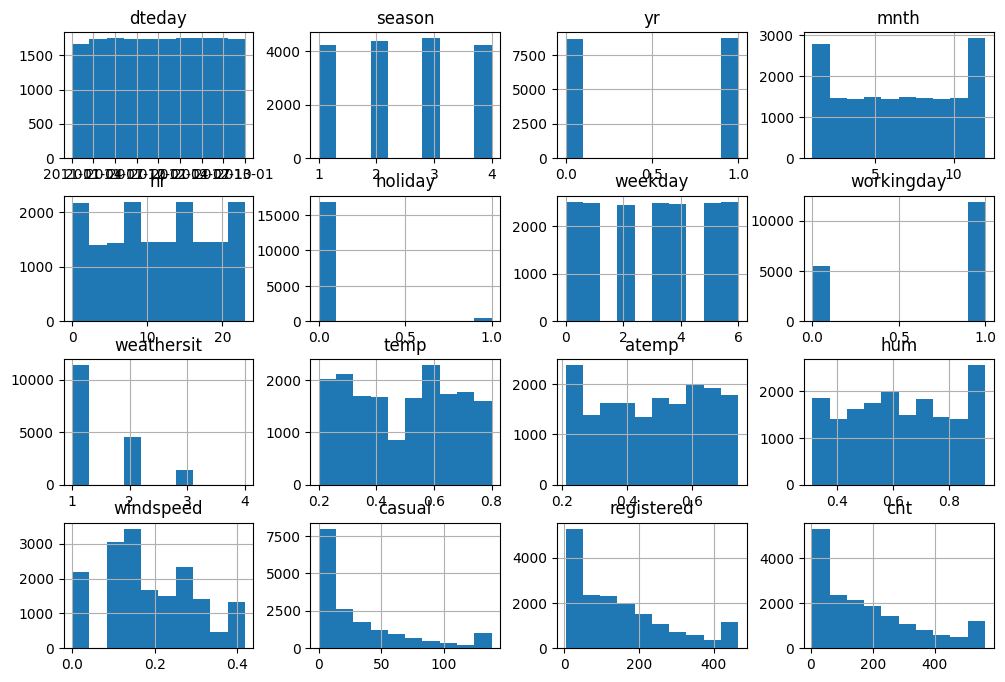

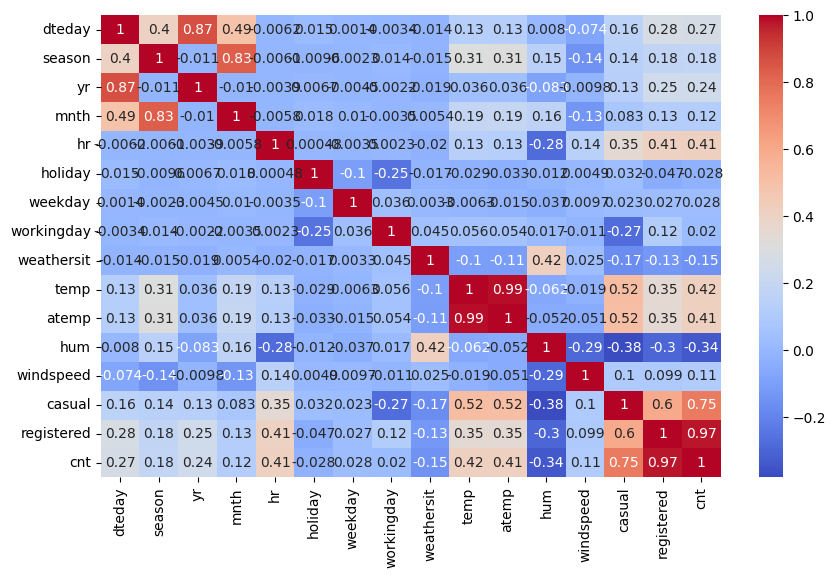

In [29]:
plt.figure(figsize=(12,6))
hour.hist(figsize=(12,8))
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(hour.corr(), annot=True, cmap="coolwarm")
plt.show()
